In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('..')

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt
from helpers.plots import plot_imgs



Using TensorFlow backend.


# Classifier

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

nb_train = 5000
nb_test = 200


## Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    
input_shape = (img_rows, img_cols, 1)


In [5]:
X_train = x_train[:nb_train]
Y_train = y_train[:nb_train]

X_test = x_test[:nb_test]
Y_test = y_test[:nb_test]


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [7]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5000, 28, 28, 1), (5000, 10), (200, 28, 28, 1), (200, 10))

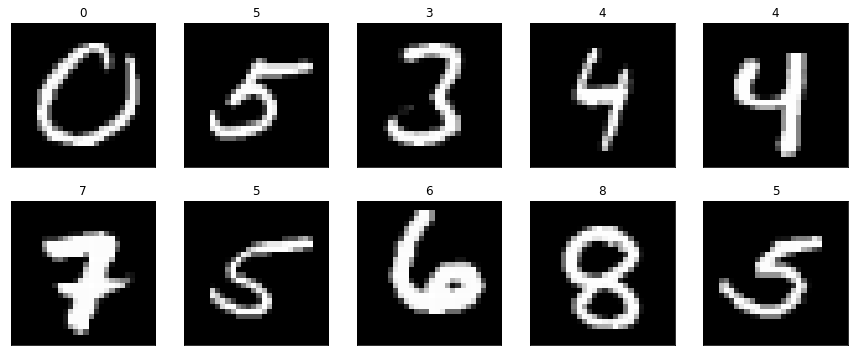

In [8]:
plot_imgs(X_train, Y_train, shape=(28, 28), shuffle=True)


## Model definition

In [9]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


## Model fit

In [10]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)


Instructions for updating:
Use tf.cast instead.
Epoch 1/12
5000/5000 [==============================] - 1s 146us/step - loss: 1.3068 - acc: 0.6604
Epoch 2/12
5000/5000 [==============================] - 0s 87us/step - loss: 0.4232 - acc: 0.8766
Epoch 3/12
5000/5000 [==============================] - 0s 85us/step - loss: 0.3291 - acc: 0.9044
Epoch 4/12
5000/5000 [==============================] - 0s 83us/step - loss: 0.2876 - acc: 0.9192
Epoch 5/12
5000/5000 [==============================] - 0s 85us/step - loss: 0.2568 - acc: 0.9268
Epoch 6/12
5000/5000 [==============================] - 0s 84us/step - loss: nan - acc: 0.2698
Epoch 7/12
5000/5000 [==============================] - 0s 84us/step - loss: nan - acc: 0.0958
Epoch 8/12
5000/5000 [==============================] - 0s 87us/step - loss: nan - acc: 0.0958
Epoch 9/12
5000/5000 [==============================] - 0s 82us/step - loss: nan - acc: 0.0958
Epoch 10/12
5000/5000 [==============================] - 0s 85us/step - loss: nan

In [11]:
print('Train: ', model.evaluate(X_train, Y_train))
print('Test: ', model.evaluate(X_test, Y_test))


5000/5000 [==============================] - 1s 112us/step
Train:  [nan, 0.0958]
200/200 [==============================] - 0s 98us/step
Test:  [nan, 0.085]


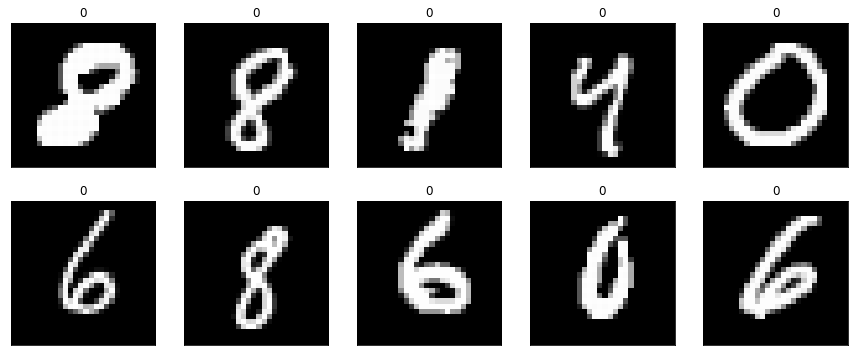

In [12]:
Y_pred = model.predict(X_train)
plot_imgs(X_train, Y_pred, shape=(28, 28), shuffle=True)


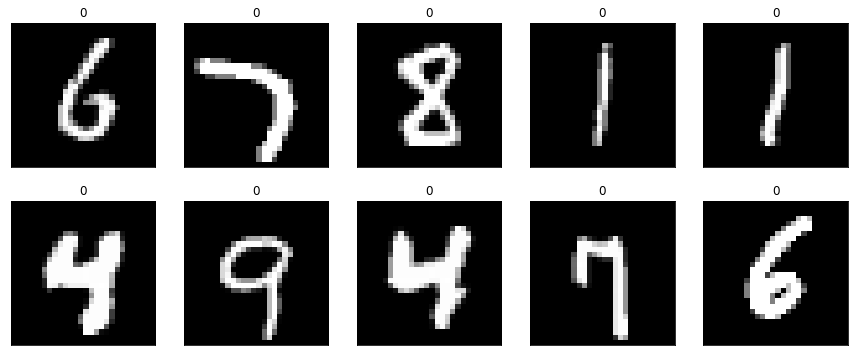

In [13]:
Y_pred = model.predict(X_test)
plot_imgs(X_test, Y_pred, shape=(28, 28), shuffle=True)
